# ***Análisis de comportamiento en redes sociales usando Procesamiento del Lenguaje Natural***

**Instructor:** Hugo Porras

**Linkedin:** https://www.linkedin.com/in/hugo-b-porras-e-bb405512b/

**Correo de contacto:** hugo-sXe@hotmail.com

**Número de contacto:** +593998403685

# **Capítulo 3: Obtención y procesamiento de datos de texto**

## **1. Estructuración de datos**

### **1.1. Libreria NLTK**

<img src="https://robocrop.realpython.net/?url=https%3A//files.realpython.com/media/NLP-for-Beginners-Pythons-Natural-Language-Toolkit-NLTK_Watermarked.16a787c1e9c6.jpg&w=960&sig=489cef9f55568ff91dbf28a8d48eaa4fab212196" width="500" alt="" />

Acorde al sitio web de [NLTK](https://www.nltk.org/), esta *''es la plataforma líder para construir programas en Python que trabajen con datos del lenguaje humano. Provee interfaces fáciles de usar para acceder a cerca de 50 corpora y recursos léxicos como WordNet, así como librerías de procesamiento de texto, clasificación, tokenización, stemming, etiquetado POS, análisis sintáctico y razonamiento semántico, además de tener fortalezas en ambientes de producción y un foro de discusión activo.''* (traducido del inglés).

Así para comenzar nuestro trabajo cargaremos e instalaremos la librería necesaria *NLTK*, además de *pandas* (para manipulación de datos), *numpy* (para trabajo con arreglos), *matplotlib* para realizar gráficos y *re* para manejar expresiones regulares:

In [1]:
from google.colab import files
uploaded = files.upload()

Saving noticias_Guillermo_Lasso.xlsx to noticias_Guillermo_Lasso.xlsx


In [ ]:
#!pip install nltk

In [ ]:
#!pip install spacy-udpipe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import requests
import spacy_udpipe as udpipe
import pickle
from scrapy import Selector
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import ngrams

ModuleNotFoundError: ignored

Una vez que tengamos las librerías necesarias, cargaremos los datos que obtuvimos de la web en el capítulo anterior. 

In [ ]:
noticiasLasso_df = pd.read_excel('noticias_Guillermo_Lasso.xlsx', index_col=0)

Y recordemos lo que esta tiene:

In [ ]:
noticiasLasso_df.head()

,Titular,Diario,Fechas,Link,Noticia
1,Guillermo Lasso caminó como parte de su recupe...,El Comercio (Ecuador),2021-06-23T18:50:00Z,https://news.google.com/articles/CBMiX2h0dHBzO...,El presidente Guillermo Lasso continúa su pr...
2,"Mientras se recupera de la operación, Guillerm...",El Universo,2021-06-24T17:44:14Z,https://news.google.com/articles/CBMipgFodHRwc...,El presidente Guillermo Lasso recibió este jue...
4,Dos normas vigentes se contraponen al decreto ...,El Universo,2021-06-25T13:00:00Z,https://news.google.com/articles/CBMioAFodHRwc...,El Decreto Ejecutivo 418 de julio del 2010 ...
8,El presidente Guillermo Lasso se toma fotograf...,El Universo,2021-06-19T14:57:09Z,https://news.google.com/articles/CBMiiAFodHRwc...,"La tarde de este viernes, una singular imagen ..."
9,Guillermo Lasso deroga decreto que extendía se...,El Universo,2021-06-15T07:00:00Z,https://news.google.com/articles/CBMinwFodHRwc...,El presidente Guillermo Lasso suscribió este m...


En este conjunto de datos tenemos 5 columnas:

+ La fecha en la que fue publicada la noticia
+ El diario/página que publicó el titular
+ El titular de la noticia
+ El link a la noticia
+ El cuerpo de la noticia como una cadena de texto

Sobre estas columnas trabajaremos preprocesar los datos de texto. De aquí en adelante el titular de cada noticia será el identificador de documento y por ende, trateremos cada noticia como un documento.

### **1.2. Tokenización**

Al tokenizar podemos separar un texto en oraciones, palabras o n-gramas. Esta tarea nos permite trabajar con piezas de texto más pequeñas que guardan significado incluso fuera del contexto de análisis.

Es decir, vamos a crear datos estructurados a partir de datos no estructurados.

Si analizamos palabra por palabra podremos identificar particularidades respecto a frecuencias por ejemplo. Al analizar oraciones en cambio podríamos analizar contextos también.

Hagamos ahora un ejercicio.

In [ ]:
#nltk.download('punkt')

In [ ]:
ejemplo_oracion = list(noticiasLasso_df.Noticia)[0]
ejemplo_oracion

'El presidente  Guillermo Lasso  continúa su proceso de recuperación luego\xa0de la  cirugía  en la zona lumbar, que resultó con éxito y sin complicaciones. El mandatario fue sometido a una  intervención quirúrgica  en el hospital Jackson Memorial de Miami, Estados Unidos.\xa0\xa0 María de Lourdes Alcívar , esposa del Jefe de Estado, informó a través de su cuenta en Twitter, la noche del 24 de junio del 2021, que el mandatario ya se levantó y caminó.\xa0 “Rejuvenecido, mi presidente amado. Se levantó, caminó, sonreído. Con la gracia inconmensurable del amor de Dios y el cuidado de la Virgen María. Un equipo de Drs. Maravillosos. ¡Estamos agradecidos profundamente con todos!”, tuiteó.\xa0 Rejuvenecido mi Presidente amado. 🥰Se levantó,caminó.Sonreído. Con la Gracia Inconmensurable del Amor de DIOS y el cuidado de la Virgen María.Un equipo de Drs. maravillosos.Estamos Agradecidos profundamente con  [email\xa0protected] 😍,nuestros hijos, nietos y yo. Bendito Dios. La mañana de ayer había a

In [ ]:
sent_tokenize(ejemplo_oracion)

['El presidente  Guillermo Lasso  continúa su proceso de recuperación luego\xa0de la  cirugía  en la zona lumbar, que resultó con éxito y sin complicaciones.',
 'El mandatario fue sometido a una  intervención quirúrgica  en el hospital Jackson Memorial de Miami, Estados Unidos.',
 'María de Lourdes Alcívar , esposa del Jefe de Estado, informó a través de su cuenta en Twitter, la noche del 24 de junio del 2021, que el mandatario ya se levantó y caminó.',
 '“Rejuvenecido, mi presidente amado.',
 'Se levantó, caminó, sonreído.',
 'Con la gracia inconmensurable del amor de Dios y el cuidado de la Virgen María.',
 'Un equipo de Drs.',
 'Maravillosos.',
 '¡Estamos agradecidos profundamente con todos!”, tuiteó.',
 'Rejuvenecido mi Presidente amado.',
 '🥰Se levantó,caminó.Sonreído.',
 'Con la Gracia Inconmensurable del Amor de DIOS y el cuidado de la Virgen María.Un equipo de Drs.',
 'maravillosos.Estamos Agradecidos profundamente con  [email\xa0protected] 😍,nuestros hijos, nietos y yo.',
 'Be

In [ ]:
ejemplo_palabra = list(noticiasLasso_df.Noticia)[0].split(".")[2]
ejemplo_palabra

'\xa0\xa0 María de Lourdes Alcívar , esposa del Jefe de Estado, informó a través de su cuenta en Twitter, la noche del 24 de junio del 2021, que el mandatario ya se levantó y caminó'

In [ ]:
word_tokenize(ejemplo_palabra)

['María',
 'de',
 'Lourdes',
 'Alcívar',
 ',',
 'esposa',
 'del',
 'Jefe',
 'de',
 'Estado',
 ',',
 'informó',
 'a',
 'través',
 'de',
 'su',
 'cuenta',
 'en',
 'Twitter',
 ',',
 'la',
 'noche',
 'del',
 '24',
 'de',
 'junio',
 'del',
 '2021',
 ',',
 'que',
 'el',
 'mandatario',
 'ya',
 'se',
 'levantó',
 'y',
 'caminó']

Si deseamos tokenizar todas las oraciones utilizaremos listas de comprensión:

In [ ]:
noticiasLasso_df['word_token'] = [word_tokenize(i) for i in list(noticiasLasso_df.Noticia)]

In [ ]:
noticiasLasso_df.head()

,Titular,Diario,Fechas,Link,Noticia,word_token
1,Guillermo Lasso caminó como parte de su recupe...,El Comercio (Ecuador),2021-06-23T18:50:00Z,https://news.google.com/articles/CBMiX2h0dHBzO...,El presidente Guillermo Lasso continúa su pr...,"[El, presidente, Guillermo, Lasso, continúa, s..."
2,"Mientras se recupera de la operación, Guillerm...",El Universo,2021-06-24T17:44:14Z,https://news.google.com/articles/CBMipgFodHRwc...,El presidente Guillermo Lasso recibió este jue...,"[El, presidente, Guillermo, Lasso, recibió, es..."
4,Dos normas vigentes se contraponen al decreto ...,El Universo,2021-06-25T13:00:00Z,https://news.google.com/articles/CBMioAFodHRwc...,El Decreto Ejecutivo 418 de julio del 2010 ...,"[El, Decreto, Ejecutivo, 418, de, julio, del, ..."
8,El presidente Guillermo Lasso se toma fotograf...,El Universo,2021-06-19T14:57:09Z,https://news.google.com/articles/CBMiiAFodHRwc...,"La tarde de este viernes, una singular imagen ...","[La, tarde, de, este, viernes, ,, una, singula..."
9,Guillermo Lasso deroga decreto que extendía se...,El Universo,2021-06-15T07:00:00Z,https://news.google.com/articles/CBMinwFodHRwc...,El presidente Guillermo Lasso suscribió este m...,"[El, presidente, Guillermo, Lasso, suscribió, ..."


Como podemos ver, los tokens están aún en mayúsculas, tienen números y símbolos, así q debemos realizar una limpieza más profunda. Para ello, continuemos con el ejemplo.

In [ ]:
# Removemos caracteres especiales y pasamos a minúscula
ejemplo_palabra_token = [re.sub(r'\W+', '', i.lower()) for i in word_tokenize(ejemplo_palabra)]
ejemplo_palabra_token

['maría',
 'de',
 'lourdes',
 'alcívar',
 '',
 'esposa',
 'del',
 'jefe',
 'de',
 'estado',
 '',
 'informó',
 'a',
 'través',
 'de',
 'su',
 'cuenta',
 'en',
 'twitter',
 '',
 'la',
 'noche',
 'del',
 '24',
 'de',
 'junio',
 'del',
 '2021',
 '',
 'que',
 'el',
 'mandatario',
 'ya',
 'se',
 'levantó',
 'y',
 'caminó']

In [ ]:
# Removemos tokens vacíos
ejemplo_palabra_token = [i for i in ejemplo_palabra_token if i!='']
ejemplo_palabra_token

['maría',
 'de',
 'lourdes',
 'alcívar',
 'esposa',
 'del',
 'jefe',
 'de',
 'estado',
 'informó',
 'a',
 'través',
 'de',
 'su',
 'cuenta',
 'en',
 'twitter',
 'la',
 'noche',
 'del',
 '24',
 'de',
 'junio',
 'del',
 '2021',
 'que',
 'el',
 'mandatario',
 'ya',
 'se',
 'levantó',
 'y',
 'caminó']

In [ ]:
# Limpieza de números
ejemplo_oracion = [re.sub(r'[0-9]+','',i) for i in ejemplo_palabra_token]
ejemplo_oracion

['maría',
 'de',
 'lourdes',
 'alcívar',
 'esposa',
 'del',
 'jefe',
 'de',
 'estado',
 'informó',
 'a',
 'través',
 'de',
 'su',
 'cuenta',
 'en',
 'twitter',
 'la',
 'noche',
 'del',
 '',
 'de',
 'junio',
 'del',
 '',
 'que',
 'el',
 'mandatario',
 'ya',
 'se',
 'levantó',
 'y',
 'caminó']

In [ ]:
# Creamos una función de limpieza y tokenización
def word_tokenize_clean(sentence, to_lower=True, remove_special_chars=True, remove_numbers=True):
    token_clean = word_tokenize(sentence)
    if to_lower:
        token_clean = [i.lower() for i in token_clean]
    if remove_special_chars:
        token_clean = [re.sub(r'\W+', '', i) for i in token_clean]
    if remove_numbers:
        token_clean = [re.sub(r'[0-9]+', '', i) for i in token_clean] 
    token_clean = [i for i in token_clean if i!='']
    return token_clean

In [ ]:
# Ejemplo de la función
word_tokenize_clean(ejemplo_palabra)

['maría',
 'de',
 'lourdes',
 'alcívar',
 'esposa',
 'del',
 'jefe',
 'de',
 'estado',
 'informó',
 'a',
 'través',
 'de',
 'su',
 'cuenta',
 'en',
 'twitter',
 'la',
 'noche',
 'del',
 'de',
 'junio',
 'del',
 'que',
 'el',
 'mandatario',
 'ya',
 'se',
 'levantó',
 'y',
 'caminó']

In [ ]:
# Sustituimos la columna que teníamos antes
noticiasLasso_df['word_token'] = [word_tokenize_clean(i) for i in list(noticiasLasso_df.Noticia)]

In [ ]:
noticiasLasso_df.head()

,Titular,Diario,Fechas,Link,Noticia,word_token
1,Guillermo Lasso caminó como parte de su recupe...,El Comercio (Ecuador),2021-06-23T18:50:00Z,https://news.google.com/articles/CBMiX2h0dHBzO...,El presidente Guillermo Lasso continúa su pr...,"[el, presidente, guillermo, lasso, continúa, s..."
2,"Mientras se recupera de la operación, Guillerm...",El Universo,2021-06-24T17:44:14Z,https://news.google.com/articles/CBMipgFodHRwc...,El presidente Guillermo Lasso recibió este jue...,"[el, presidente, guillermo, lasso, recibió, es..."
4,Dos normas vigentes se contraponen al decreto ...,El Universo,2021-06-25T13:00:00Z,https://news.google.com/articles/CBMioAFodHRwc...,El Decreto Ejecutivo 418 de julio del 2010 ...,"[el, decreto, ejecutivo, de, julio, del, y, el..."
8,El presidente Guillermo Lasso se toma fotograf...,El Universo,2021-06-19T14:57:09Z,https://news.google.com/articles/CBMiiAFodHRwc...,"La tarde de este viernes, una singular imagen ...","[la, tarde, de, este, viernes, una, singular, ..."
9,Guillermo Lasso deroga decreto que extendía se...,El Universo,2021-06-15T07:00:00Z,https://news.google.com/articles/CBMinwFodHRwc...,El presidente Guillermo Lasso suscribió este m...,"[el, presidente, guillermo, lasso, suscribió, ..."


### **1.3. Palabras vacías**

Una vez que los datos han sido tokenizados, podemos pasar a la parte de manipulación. En este análisis, y en muchos análisis de texto, puede ser útil quitar las llamadas ''palabras vacías'' o ''stopwords''. Estas son palabras que no son útiles para el análisis. Usualmente estas incluyen artículos, pronombres, preposiciones, etc.

La librería nltk incluye un diccionario de stopwords cargado en varios idiomas; entre ellos, el español. Para cargar este diccionario y realizar la limpieza utilizaremos el siguiente código.

In [ ]:
#nltk.download('stopwords')

In [ ]:
# Revisamos las stopwords existentes en español
stopwords.words('spanish')[0:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [ ]:
# Removemos stopwords en el ejemplo revisado
[i for i in word_tokenize_clean(ejemplo_palabra) if i not in stopwords.words('spanish')]

['maría',
 'lourdes',
 'alcívar',
 'esposa',
 'jefe',
 'informó',
 'través',
 'cuenta',
 'twitter',
 'noche',
 'junio',
 'mandatario',
 'levantó',
 'caminó']

In [ ]:
# Creamos una versión modificada de nuestra función que excluya stopwords
def word_tokenize_clean(sentence, to_lower=True, remove_special_chars=True, 
                        remove_numbers=True, remove_stopwords=True):
    token_clean = word_tokenize(sentence)
    if to_lower:
        token_clean = [i.lower() for i in token_clean]
    if remove_special_chars:
        token_clean = [re.sub(r'\W+', '', i) for i in token_clean]
    if remove_numbers:
        token_clean = [re.sub(r'[0-9]+', '', i) for i in token_clean] 
    if remove_stopwords:
        token_clean = [i for i in token_clean if i.lower() not in stopwords.words('spanish')]
    token_clean = [i for i in token_clean if i!='']
    return token_clean

In [ ]:
word_tokenize_clean(ejemplo_palabra)

['maría',
 'lourdes',
 'alcívar',
 'esposa',
 'jefe',
 'informó',
 'través',
 'cuenta',
 'twitter',
 'noche',
 'junio',
 'mandatario',
 'levantó',
 'caminó']

Que tal si ahora hacemos lo mismo tokenizando con n-gramas.

In [ ]:
# Tokenización con la función base
[' '.join(i) for i in ngrams(word_tokenize(ejemplo_palabra), 2)]

['María de',
 'de Lourdes',
 'Lourdes Alcívar',
 'Alcívar ,',
 ', esposa',
 'esposa del',
 'del Jefe',
 'Jefe de',
 'de Estado',
 'Estado ,',
 ', informó',
 'informó a',
 'a través',
 'través de',
 'de su',
 'su cuenta',
 'cuenta en',
 'en Twitter',
 'Twitter ,',
 ', la',
 'la noche',
 'noche del',
 'del 24',
 '24 de',
 'de junio',
 'junio del',
 'del 2021',
 '2021 ,',
 ', que',
 'que el',
 'el mandatario',
 'mandatario ya',
 'ya se',
 'se levantó',
 'levantó y',
 'y caminó']

In [ ]:
# Tokenización con la función personalizada
[' '.join(i) for i in ngrams(word_tokenize_clean(ejemplo_palabra), 2)]

['maría lourdes',
 'lourdes alcívar',
 'alcívar esposa',
 'esposa jefe',
 'jefe informó',
 'informó través',
 'través cuenta',
 'cuenta twitter',
 'twitter noche',
 'noche junio',
 'junio mandatario',
 'mandatario levantó',
 'levantó caminó']

Con esta función, actualizamos nuestro dataframe.

In [ ]:
# Sustituimos la columna que teníamos antes
noticiasLasso_df['word_token'] = [word_tokenize_clean(i) for i in list(noticiasLasso_df.Noticia)]

In [ ]:
noticiasLasso_df.head()

,Titular,Diario,Fechas,Link,Noticia,word_token
1,Guillermo Lasso caminó como parte de su recupe...,El Comercio (Ecuador),2021-06-23T18:50:00Z,https://news.google.com/articles/CBMiX2h0dHBzO...,El presidente Guillermo Lasso continúa su pr...,"[presidente, guillermo, lasso, continúa, proce..."
2,"Mientras se recupera de la operación, Guillerm...",El Universo,2021-06-24T17:44:14Z,https://news.google.com/articles/CBMipgFodHRwc...,El presidente Guillermo Lasso recibió este jue...,"[presidente, guillermo, lasso, recibió, jueves..."
4,Dos normas vigentes se contraponen al decreto ...,El Universo,2021-06-25T13:00:00Z,https://news.google.com/articles/CBMioAFodHRwc...,El Decreto Ejecutivo 418 de julio del 2010 ...,"[decreto, ejecutivo, julio, acuerdo, secretarí..."
8,El presidente Guillermo Lasso se toma fotograf...,El Universo,2021-06-19T14:57:09Z,https://news.google.com/articles/CBMiiAFodHRwc...,"La tarde de este viernes, una singular imagen ...","[tarde, viernes, singular, imagen, presidente,..."
9,Guillermo Lasso deroga decreto que extendía se...,El Universo,2021-06-15T07:00:00Z,https://news.google.com/articles/CBMinwFodHRwc...,El presidente Guillermo Lasso suscribió este m...,"[presidente, guillermo, lasso, suscribió, mart..."


### **1.4. Expresiones regulares (REGEX)**

Una expresión regular es un patrón que describe un conjunto específico de cadenas de texto (strings) que tienen una estructura en común y son usadas para buscar coincidencias y/o reemplazarlas. Las expresiones regulares son en realidad el centro de las operaciones con cadenas de texto en todos los lenguajes de programación, aunque su sintaxis varía un poco en cada uno.

En Python, podemos realizar estas transformaciones a través de la librería *re* y métodos sobre *strings*. A continuación podemos ver algunas de estas tareas y sus funciones asociadas:

+ Identificar o extraer coincidencias de texto: *re.search*.
+ Localizar un patrón dentro de una cadena de texto (i.e. obtener la posición del inicio y el final de la coincidencia): string.find.
+ Reemplazar un patrón de texto: re.sub().
+ Dividir una cadena de texto en partes acorde a un patrón: string.split().

Dentro de las expresiones regulares usaremos además algunos cuantificadores y operadores:

+ \* busca las coincidencias al menos cero veces.
+ \+ busca las coincidencias al menos una vez.
+ ? busca las coincidencias máximo una vez.
+ {n} busca las coincidencias exactamente n veces.
+ {n,} busca las coincidencias al menos n veces.
+ {n,m} busca las coincidencias entre n y m veces.
+ ^ busca al principio de la cadena.
+ $ busca al final de la cadena.
+ \d busca dígitos.
+ \D busca no-dígitos.

A continuación veremos algunos ejemplos utilizando nuestros datos.

In [ ]:
# Reemplazar letras a por X
print(re.sub('a|A',"X",ejemplo_palabra))

   MXríX de Lourdes XlcívXr , esposX del Jefe de EstXdo, informó X trXvés de su cuentX en Twitter, lX noche del 24 de junio del 2021, que el mXndXtXrio yX se levXntó y cXminó


In [ ]:
# Reemplazar espacios con tabuladores
print(re.sub(' ',"\t",ejemplo_palabra))

  	María	de	Lourdes	Alcívar	,	esposa	del	Jefe	de	Estado,	informó	a	través	de	su	cuenta	en	Twitter,	la	noche	del	24	de	junio	del	2021,	que	el	mandatario	ya	se	levantó	y	caminó


In [ ]:
# Reemplazar letras por Y
print(re.sub(r"[A-Za-z]","Y",ejemplo_palabra))

   YYYíY YY YYYYYYY YYYíYYY , YYYYYY YYY YYYY YY YYYYYY, YYYYYYó Y YYYYéY YY YY YYYYYY YY YYYYYYY, YY YYYYY YYY 24 YY YYYYY YYY 2021, YYY YY YYYYYYYYYY YY YY YYYYYYó Y YYYYYó


In [ ]:
# Reemplazar mayúsculas por Z
print(re.sub(r"[A-Z]","Z",ejemplo_palabra))

   Zaría de Zourdes Zlcívar , esposa del Zefe de Zstado, informó a través de su cuenta en Zwitter, la noche del 24 de junio del 2021, que el mandatario ya se levantó y caminó


In [ ]:
# Reemplazar dígitos por Z
print(re.sub(r"\d","Z",ejemplo_palabra))

   María de Lourdes Alcívar , esposa del Jefe de Estado, informó a través de su cuenta en Twitter, la noche del ZZ de junio del ZZZZ, que el mandatario ya se levantó y caminó


In [ ]:
# Dividir la cadena de texto por a
print(ejemplo_palabra.split('a'))

['\xa0\xa0 M', 'rí', ' de Lourdes Alcív', 'r , espos', ' del Jefe de Est', 'do, informó ', ' tr', 'vés de su cuent', ' en Twitter, l', ' noche del 24 de junio del 2021, que el m', 'nd', 't', 'rio y', ' se lev', 'ntó y c', 'minó']


In [ ]:
# Encontrar una cadena de texto
re.search(r'Mar',ejemplo_palabra)

<re.Match object; span=(3, 6), match='Mar'>

In [ ]:
# Encontrar inicio de una cadena de texto
ejemplo_palabra.find(r'Mar')

3

In [ ]:
# Qué pasa si no encuentra
ejemplo_palabra.find(r'Hugo')

-1

## **2. Stemming y Lematización**

### **2.1. Stemming**

El ''stemming'' es un método para reducir una palabra a su raíz o morfema. Esto se hace con el objetivo de analizar variaciones de una palabra como una sola. Supongamos por ejemplo que tenemos el conjunto de palabras: {moderniza, moderno, moderna, modernos, modernización}. Lo que quisieramos es tener solo la raíz de estas palabras, que en último punto, son iguales. Al realizar el stemming sobre el conjunto mostrado obtendríamos: {modern, modern, modern, modern, modern}.

Actualmente existen varios algoritmos que realizan stemming, los cuales trabajan cortando el final o inicio de una palabra, tomando en cuenta la existencia de prefijos y sufijos que suelen ser comunes. En un gran número de casos este proceso suele ser exitoso, pero no siempre.

Para lograr esto en Python utilizaremos la versión en español del algoritmo de Porter. Este algoritmo funciona acorde a 6 reglas:

+ Un identificador de regla
+ El sufijo a identificar
+ El texto por el cual debe ser reemplazado al encontrar el sufijo
+ El tamaño del sufijo
+ El tamaño del texto de reemplazo
+ El tamaño mínimo que debe tener la raíz resultante luego de aplicar la regla (esto es a los efectos de no procesar palabras demasiado pequeñas)
+ Una función de validación (una función que verifica si se debe aplicar la regla una vez encontrado el sufijo)

Para ejecutarlo utilizaremos el siguiente código:

In [ ]:
# Inicializamos el stemmer en español
stemmer = SnowballStemmer('spanish')
stemmer

In [ ]:
# Hacemos el stemming sobre la oración
[stemmer.stem(i) for i in word_tokenize_clean(ejemplo_palabra)]

['mar',
 'lourd',
 'alciv',
 'espos',
 'jef',
 'inform',
 'traves',
 'cuent',
 'twitt',
 'noch',
 'juni',
 'mandatari',
 'levant',
 'camin']

### **2.2. Lematización**

La lematización es un proceso con los mismos objetivos del stemming, pero en lugar de obtener el morfema, obtendríamos la palabra raíz. Para el ejemplo mostrado esperaríamos el siguiente conjunto: {moderno, moderno, moderno, moderno, moderno}.

Así, la lematización realiza el análisis morfológico de las palabras, y para ello toma en cuenta diccionarios detallados a través de los cuales busca una forma de enlazar cada palabra a su lemma. Por ende, esta metodología está íntimamente ligada a la lingüística.

Las maneras más comunes de lematizar incluyen el uso de modelos probabilísticos, cadenas de markov o diccionarios. La lematización al español con *nltk* no está disponible pero lo podemos hacer a través de dos métodos:

+ Lematización a través de diccionarios ([diccionario lematizador online](https://www.lenguaje.com/cgi-bin/lema.exe?edition_field=sumar&B1=Lematizar)).

In [ ]:
# Definimos una función para lematizar
def lematiza(palabra):
    base_url = 'https://www.lenguaje.com/cgi-bin/lema.exe?edition_field='+palabra+"&B1=Lematizar"
    selector_lemma = Selector(text = requests.get(base_url).content)
    lemma = selector_lemma.css('div div div div div li').css('::text').extract()[0]
    if lemma=='Raíz del sustantivo "suma". ':
        lemma = ''
    return lemma    

In [ ]:
# Ejecutamos un ejemplo
lematiza('comimos')

'comer'

+ Lematización pre-entrenada de udpipe. UDPipe es un modelo pre-entrenado para tareas esenciales de PLN y fue creada por la Facultad de Matemáticas y Física de la Universidad de República Checa. Esta nos permitirá utilizar un modelo pre-entrenado para (entre otras cosas) realizar neurolematización sobre nuestros datos. Para utilizarlo, cargaremos la librería *spacy* (específicamente spacy-udpipe), la cual, al igual que *nltk* permite realizar varias tareas relacionadas al análisis de texto.

In [ ]:
# Descargamos el modelo para el idioima español
udpipe.download('es')

Already downloaded a model for the 'es' language


In [ ]:
# Cargamos el modelo
nlp_model_es = udpipe.load('es')

In [ ]:
# Convertimos el texto en un documento
doc = nlp_model_es(word_tokenize_clean(ejemplo_palabra))
doc

maría lourdes alcívar esposa jefe informó través cuenta twitter noche junio mandatario levantó caminó

In [ ]:
# Realizamos la anotación sobre nuestro ejemplo
[(token.text, token.lemma_, token.pos_) for token in doc]

[('maría', 'marir', 'NOUN'),
 ('lourdes', 'lourde', 'NOUN'),
 ('alcívar', 'alcívar', 'VERB'),
 ('esposa', 'esposar', 'NOUN'),
 ('jefe', 'jefe', 'NOUN'),
 ('informó', 'informar', 'VERB'),
 ('través', 'través', 'NOUN'),
 ('cuenta', 'contar', 'NOUN'),
 ('twitter', 'twitter', 'VERB'),
 ('noche', 'noche', 'NOUN'),
 ('junio', 'junio', 'NOUN'),
 ('mandatario', 'mandatario', 'NOUN'),
 ('levantó', 'levantar', 'VERB'),
 ('caminó', 'caminar', 'VERB')]

In [ ]:
# Probemos para una noticia entera
doc = nlp_model_es(list(noticiasLasso_df.Noticia)[0])
[(token.text, token.lemma_, token.pos_) for token in doc][160:180]

[('protected', 'protected', 'NOUN'),
 (']', ']', 'PUNCT'),
 ('😍,nuestros', '😍,nuestro', 'DET'),
 ('hijos', 'hijo', 'NOUN'),
 (',', ',', 'PUNCT'),
 ('nietos', 'nietos', 'NOUN'),
 ('y', 'y', 'CCONJ'),
 ('yo', 'yo', 'PRON'),
 ('.', '.', 'PUNCT'),
 ('Bendito', 'bendito', 'PROPN'),
 ('Dios', 'Dios', 'PROPN'),
 ('.', '.', 'PUNCT'),
 ('La', 'el', 'DET'),
 ('mañana', 'mañana', 'NOUN'),
 ('de', 'de', 'ADP'),
 ('ayer', 'ayer', 'ADV'),
 ('había', 'haber', 'AUX'),
 ('agradecido', 'agradecer', 'VERB'),
 ('a', 'a', 'ADP'),
 ('todos', 'todo', 'DET')]

In [ ]:
text='Noticia'
doc_id = 'Titular'

In [ ]:
# Creamos una función para etiquetar cada documento y formar con ello un dataframe
def udpipe_annotate(nlp_model, data, text, doc_id,
                    to_lower=True, remove_special_chars=True, 
                    remove_numbers=True, remove_stopwords=True):
    df_results = []
    for i in range(0,data.shape[0]):
        doc_i = nlp_model(word_tokenize_clean(data.loc[:,text].iloc[i],
                                              to_lower=to_lower, remove_special_chars=remove_special_chars, 
                                              remove_numbers=remove_numbers, remove_stopwords=remove_stopwords)) 
        doc_id_i = data.loc[:,doc_id].iloc[i]
        data_i = [(doc_id_i, token.text, token.lemma_, token.pos_) for token in doc_i]
        df_i = pd.DataFrame(data_i, columns =['doc_id', 'token', 'lemma', 'pos'])
        df_results.append(df_i)
    result = pd.concat(df_results)
    return result

In [ ]:
noticiasLasso_annotated = udpipe_annotate(nlp_model_es, noticiasLasso_df, 'Noticia', 'Titular', 
                                          to_lower=False)

In [ ]:
# Dimensión del dataset original
noticiasLasso_df.shape

(65, 6)

In [ ]:
# Dimensión del nuevo dataset
noticiasLasso_annotated.shape

(15729, 4)

In [ ]:
# Total de noticias
noticiasLasso_df.Titular.nunique()

65

In [ ]:
# Vistazo al resultado
noticiasLasso_annotated.head()

,doc_id,token,lemma,pos
0,Guillermo Lasso caminó como parte de su recupe...,presidente,presidente,NOUN
1,Guillermo Lasso caminó como parte de su recupe...,Guillermo,Guillermo,PROPN
2,Guillermo Lasso caminó como parte de su recupe...,Lasso,Lasso,ADV
3,Guillermo Lasso caminó como parte de su recupe...,continúa,continuar,VERB
4,Guillermo Lasso caminó como parte de su recupe...,proceso,proceso,NOUN


Una vez que nuestro texto se encuentra lematizado y anotado, revisemos las frecuencias de las etiquetas POS:

In [ ]:
# Realizamos el conteo por etiqueta
count_pos = noticiasLasso_annotated.groupby('pos', as_index=False).agg({'lemma':"count"}).sort_values('lemma')
count_pos.head()

,pos,lemma
12,SYM,30
4,CCONJ,54
6,INTJ,67
11,SCONJ,71
5,DET,100


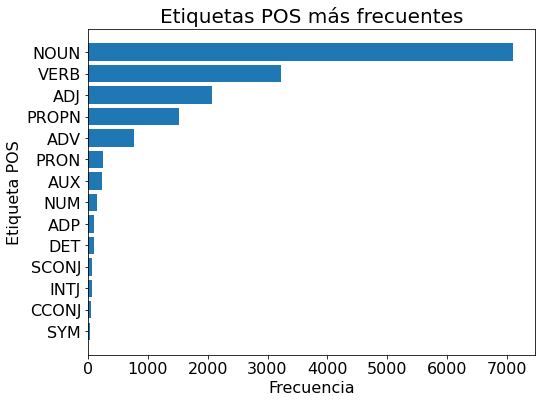

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.barh(count_pos.pos, count_pos.lemma)
plt.ylabel('Etiqueta POS', fontsize = 16)
plt.xlabel('Frecuencia', fontsize = 16)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.title('Etiquetas POS más frecuentes', fontsize = 20)
plt.show()

Ahora grafiquemos las 5 palabras más frecuentes para cada una de las 4 etiquetas más comunes:

In [ ]:
# Realizamos el conteo por etiqueta y palabra
count_pos_lemma = noticiasLasso_annotated.\
    loc[noticiasLasso_annotated.pos.isin(['NOUN','VERB','ADJ','PROPN'])].\
    groupby(['pos','lemma'], as_index=False).\
    agg({'doc_id':"count"}).\
    sort_values(['pos','doc_id'], ascending=False).\
    groupby(['pos']).\
    head(5)
count_pos_lemma

,pos,lemma,doc_id
3455,VERB,decir,83
3614,VERB,hacer,58
3922,VERB,trabajar,47
3208,VERB,Secretariar,37
3451,VERB,dar,37
2803,PROPN,Gobierno,86
2771,PROPN,Ecuador,81
2808,PROPN,Guillermo,79
2879,PROPN,Nacional,73
2775,PROPN,Ejecutivo,40


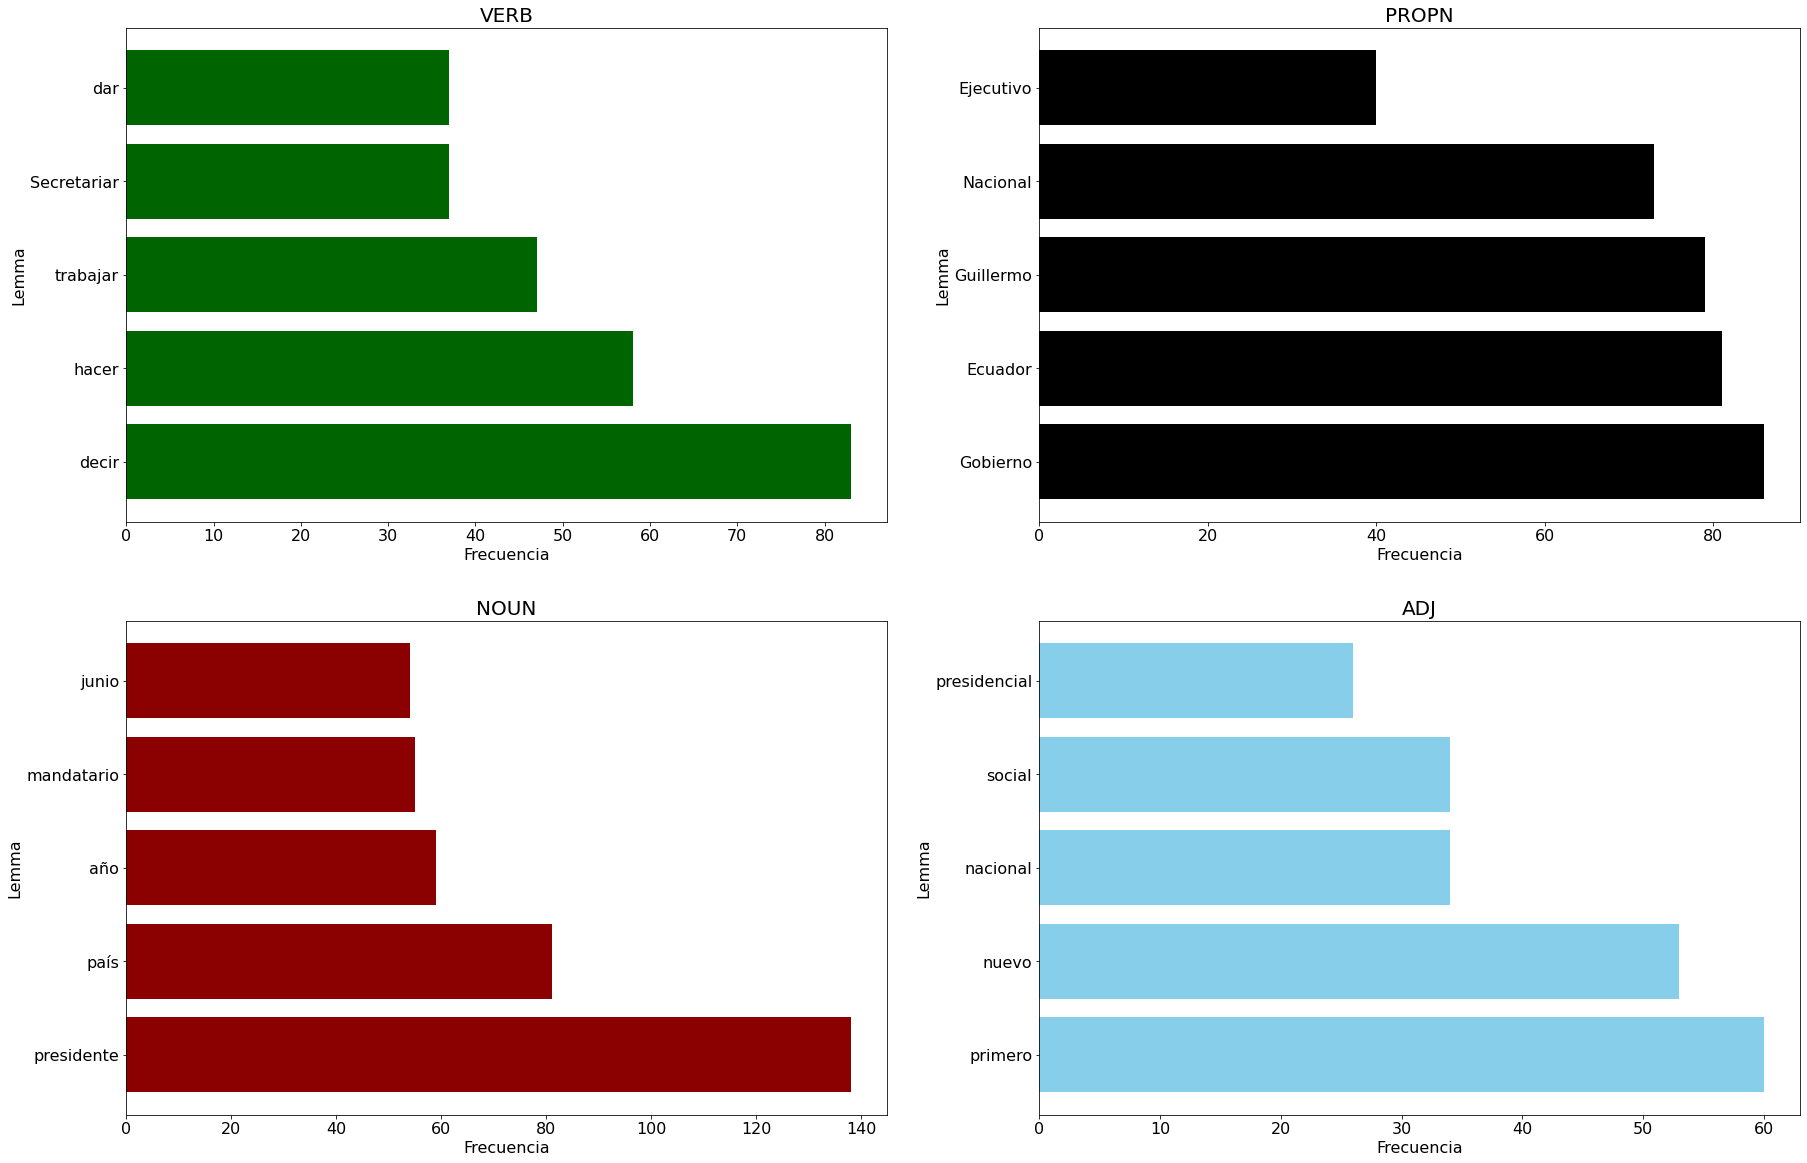

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(30,20))
ax1.barh(count_pos_lemma.loc[count_pos_lemma.pos=="VERB","lemma"],
         count_pos_lemma.loc[count_pos_lemma.pos=="VERB","doc_id"],
        color = 'darkgreen')
ax2.barh(count_pos_lemma.loc[count_pos_lemma.pos=="PROPN","lemma"],
         count_pos_lemma.loc[count_pos_lemma.pos=="PROPN","doc_id"],
        color = 'black')
ax3.barh(count_pos_lemma.loc[count_pos_lemma.pos=="NOUN","lemma"],
         count_pos_lemma.loc[count_pos_lemma.pos=="NOUN","doc_id"],
        color = 'darkred')
ax4.barh(count_pos_lemma.loc[count_pos_lemma.pos=="ADJ","lemma"],
         count_pos_lemma.loc[count_pos_lemma.pos=="ADJ","doc_id"],
        color = 'skyblue')
ax1.set_title('VERB', fontsize=20)
ax2.set_title('PROPN', fontsize=20)
ax3.set_title('NOUN', fontsize=20)
ax4.set_title('ADJ', fontsize=20)
for i in [ax1, ax2, ax3, ax4]:
    i.set_ylabel('Lemma', fontsize = 16)
    i.set_xlabel('Frecuencia', fontsize = 16)
    i.tick_params(labelsize = 16)
plt.show()

Con miras al siguiente capítulo, guardamos el dataframe tokenizado.

In [ ]:
with open('noticiasLasso_annotated', 'wb') as file:
  pickle.dump(noticiasLasso_annotated, file)

## **3. Bibliografía**

Straka, M. & Straková, J. (2017), «Tokenizing, POS tagging, lemmatizing and parsing UD 2.0 with UDPipe», CoNLL 2017 - SIGNLL Conference on Computational Natural Language Learning, Proceedings of the CoNLL 2017 Shared Task: Multilingual Parsing from Raw Text to Universal Dependencies, vol. 2.